José Luis Roberto Zárate Cortés (000183347)
### **Semana 3; Clase 3_algebra_lineal, 2_interpolacion**
### _Polyfit & Splines Cúbicos._

Ejercicio 2: Consulta la página del INEGI para obtener los datos de la población total de México en los años de 1950 a 2010 (cada 10 años) y ajusta modelos polinomiales de grados: 1, 3, 6 y spline's cúbicos. Realiza una gráfica que involucre los datos y las curvas de cada modelo. Estima la población en los años 1940, 1995 y 2020 para cada modelo y calcula tu error de estimación si la población en México en 1940 era de 19,653,552 y en 1995 de 91,158,290. Compara tu estimación para 2020 con los datos de 2018.  
**Nota:** dado que no existen datos para 2018, se utilizan los datos 2015 que era de 119,938,473

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy import arange
import pprint

In [2]:
np.set_printoptions(precision = 7)
INEGIdata = np.loadtxt('INEGI_PoblMx.txt', skiprows=1)

In [3]:
x = INEGIdata[:,0]
y = INEGIdata[:,1]

In [4]:
grafpts = 20000 # número de Puntos a graficar en los modelos
xgraf = np.linspace(min(x),max(x), grafpts)

# Polyfit

coefpol1 = np.polyfit(x,y,1)
coefpol3 = np.polyfit(x,y,3)
coefpol6 = np.polyfit(x,y,6)
np.set_printoptions(suppress=True)
pprint.pprint(coefpol1)
pprint.pprint(coefpol3)
pprint.pprint(coefpol6)
ygrafpol1 = np.polyval(coefpol1,xgraf)
ygrafpol3 = np.polyval(coefpol3,xgraf)
ygrafpol6 = np.polyval(coefpol6,xgraf)

#Splines

pw_sp = interp1d(x, y, kind = 'cubic', fill_value='extrapolate') #spline piecewise
ygrafcs = pw_sp(xgraf)

array([ 1.4920769e+06, -2.8876186e+09])
array([-2.5108803e+02,  1.4956088e+06, -2.9678465e+09,  1.9620601e+12])
array([-7.0716172e-02,  8.4016814e+02, -4.1590295e+06,  1.0980094e+10,
       -1.6305427e+13,  1.2913577e+16, -4.2612715e+18])


**_Los polinomios de interpolación son:_**

Mod Pol Grado 1: $ P_{6pts}(x) = (1.4920769*10^{6})x + (-2.8876186*10^{9}) $  
Mod Pol Grado 3: $ P_{6pts}(x) = (-251.08803x^3 + 1495608.8x^2 + (-2.9678465*10^{9})x + (1.9620601*10^{12}) $  
Mod Pol Grado 6: $ P_{6pts}(x) = -707.16172x^6 + 840.16814x^5 + -4159029.5x^4 + (1.0980094*^{10})x^3 + (-1.6305427*^{13})x^2 + (1.2913577*10^{16})x + (-4.2612715*10^{18}) $

**_POBLACIÓN MX (INEGI) GRÁFICAS DE INTERPOLACIÓN CON POLINOMIOS Y SPLINES CUBICOS_**

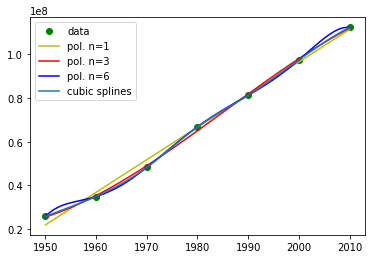

In [5]:
plt.plot(x, y, 'go', xgraf, ygrafpol1, 'y-', xgraf, ygrafpol3, 'r-', xgraf, ygrafpol6, 'b-', xgraf, ygrafcs, '-')
plt.legend(['data','pol. n=1','pol. n=3','pol. n=6','cubic splines'], loc='best')

**_ESTIMACIÓN PUNTUAL PARA LOS AÑOS 1940, 1995 Y 2020_**  
Datos conocidos:
$$\begin{bmatrix} 1940 & 1995 & 2015 \\ 1,9653,552 & 91,158,290 & 119,938,473 \end{bmatrix}$$

In [6]:
valest=np.array([[1940,1995,2015,2020],[19653552,91158290,119938473,0]],'int')
resPoln1=np.array([np.polyval(coefpol1,valest[0]),valest[1]-np.polyval(coefpol1,valest[0])])
resPoln3=np.array([np.polyval(coefpol3,valest[0]),valest[1]-np.polyval(coefpol3,valest[0])])
resPoln6=np.array([np.polyval(coefpol6,valest[0]),valest[1]-np.polyval(coefpol6,valest[0])])
resCSpl=np.array([pw_sp(valest[0]),valest[1]-pw_sp(valest[0])])

In [7]:
np.set_printoptions(precision=3)
print('Población en', valest[(0,0)], 'era de', valest[(1,0)]) 
print('Estimación polinomio grado n=1:', resPoln1[(0,0)], 'Error en la estimación:', resPoln1[(1,0)])
print('Estimación polinomio grado n=3:', resPoln3[(0,0)], 'Error en la estimación:', resPoln3[(1,0)])
print('Estimación polinomio grado n=6:', resPoln6[(0,0)], 'Error en la estimación:', resPoln6[(1,0)])
print('Estimación PW Cubic Splines:', resCSpl[(0,0)], 'Error en la estimación:', resCSpl[(1,0)])
print('Población en', valest[(0,1)], 'era de', valest[(1,1)]) 
print('Estimación polinomio grado n=1:', resPoln1[(0,1)], 'Error en la estimación:', resPoln1[(1,1)])
print('Estimación polinomio grado n=3:', resPoln3[(0,1)], 'Error en la estimación:', resPoln3[(1,1)])
print('Estimación polinomio grado n=6:', resPoln6[(0,1)], 'Error en la estimación:', resPoln6[(1,1)])
print('Estimación PW Cubic Splines:', resCSpl[(0,1)], 'Error en la estimación:', resCSpl[(1,1)])

Población en 1940 era de 19653552
Estimación polinomio grado n=1: 7010610.857142925 Error en la estimación: 12642941.142857075
Estimación polinomio grado n=3: 21024893.29321289 Error en la estimación: -1371341.2932128906
Estimación polinomio grado n=6: -68244480.0 Error en la estimación: 87898032.0
Estimación PW Cubic Splines: 15537810.642857172 Error en la estimación: 4115741.3571428284
Población en 1995 era de 91158290
Estimación polinomio grado n=1: 89074841.14285755 Error en la estimación: 2083448.8571424484
Estimación polinomio grado n=3: 90138305.9663086 Error en la estimación: 1019984.0336914062
Estimación polinomio grado n=6: 88493568.0 Error en la estimación: 2664722.0
Estimación PW Cubic Splines: 89101821.60267858 Error en la estimación: 2056468.397321418


In [8]:
print('Población en', valest[(0,2)], 'era de', valest[(1,2)], 'a comparar con estimación para el año', valest[(0,3)]) 
print('Estimación polinomio grado n=1:', resPoln1[(0,3)])
print('Estimación polinomio grado n=3:', resPoln3[(0,3)])
print('Estimación polinomio grado n=6:', resPoln6[(0,3)])
print('Estimación PW Cubic Splines:', resCSpl[(0,3)])

Población en 2015 era de 119938473 a comparar con estimación para el año 2020
Estimación polinomio grado n=1: 126376764.00000095
Estimación polinomio grado n=3: 122312708.42700195
Estimación polinomio grado n=6: 37668352.0
Estimación PW Cubic Splines: 118812430.64285716


**_CONCLUSIONES:_**  
Para la extrapolación de 1940, los modelos demostraron en general un comportamiento inestable (interpolación pol grado 6 el de mayor inestrabilidad); se observó que en la interpolación cúbica y la de splines cúbicos la imprecisión es menor.

Para la interpolación de 1995, todos los modelos demostraron estabilidad, con un error en la estimación muy similar, considerando el polinomio de grado 3 el de mejor estimación y el de grado 6 el de menor.

Para la extrapolación de 2020, con relación a 2015, y considerando nuestro actual conocimiento sobre un valor aproximado de 125 mdpax, se observó que sólo el polinomio de grado 1 es el que tiene una mayor grado de precisión, pues reconoce adecuadamente el comportamiento creciente. El polinomio de grado 3 reconoce la tendencia de crecimiento pero más lentamente. Finalmente, el polinomio de grado 6 presente un comportamiento sumamente inestable, pues proyecta un decrecimiento muy acelerado e inconsistente con los valores actuales.
